In [3]:
import pandas as pd
import numpy as np

tips = pd.read_csv('tips.csv')
tips.head() # print first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips["sex"].unique()
# Value counts

array(['Female', 'Male'], dtype=object)

In [12]:
tips["sex"].value_counts()
# Only for categorical data coloumns

,count
sex,
Male,157
Female,87


In [13]:
tips["day"].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [14]:
tips["smoker"].value_counts()

,count
smoker,
No,151
Yes,93


In [15]:
tips["time"].value_counts()

,count
time,
Dinner,176
Lunch,68


# Measures of central tendency

In [6]:
tips["tip"].mean()

2.99827868852459

In [7]:
round(tips["tip"].mean(),3)
# mean (best provided no outlier presence)

2.998

<Axes: ylabel='tip'>

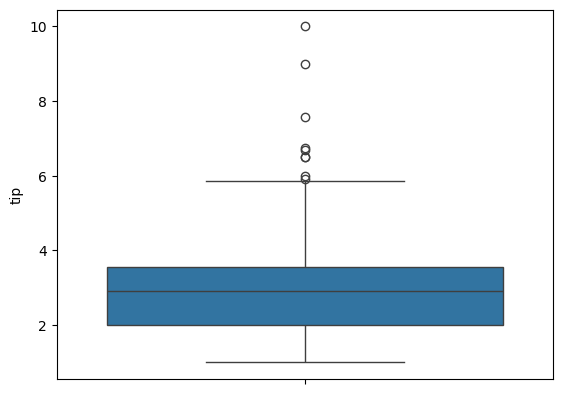

In [8]:
# box plot to detect outliers
import seaborn as sns
sns.boxplot(tips["tip"])

In [9]:
# median in skewed cases
tips["tip"].median()

2.9

In [10]:
# median is almost same as mean so not taking it as no significant difference

# mode for categorical data
tips["sex"].mode()

,sex
0,Male


In [11]:
tips['day'].mode()

,day
0,Sat


<Axes: xlabel='count', ylabel='sex'>

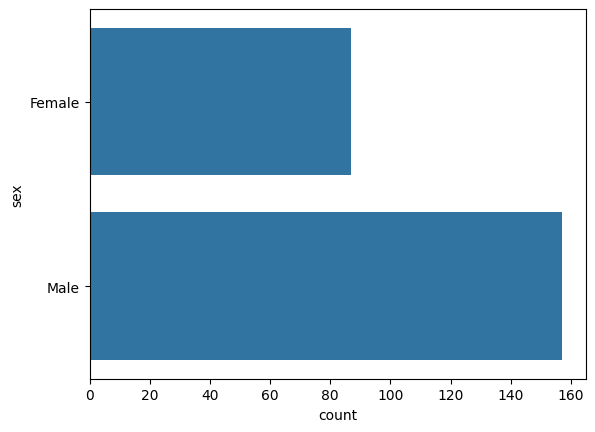

In [16]:
sns.countplot(tips['sex'])

<Axes: xlabel='count', ylabel='smoker'>

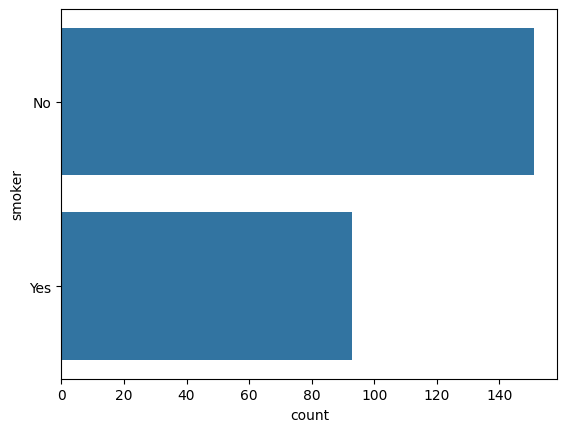

In [17]:
sns.countplot(tips['smoker'])

<Axes: xlabel='count', ylabel='day'>

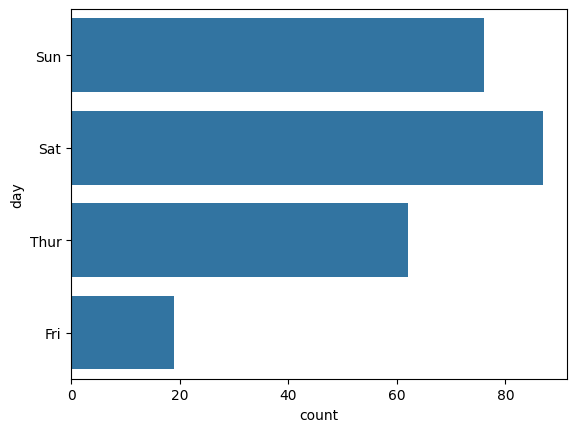

In [18]:
sns.countplot(tips['day'])

<Axes: xlabel='count', ylabel='time'>

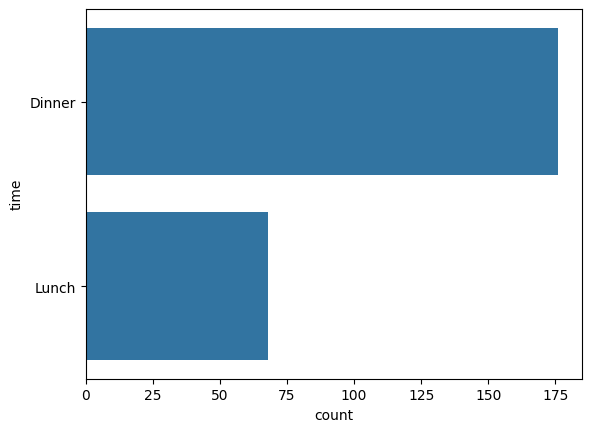

In [19]:
sns.countplot(tips['time'])

<Axes: xlabel='time', ylabel='count'>

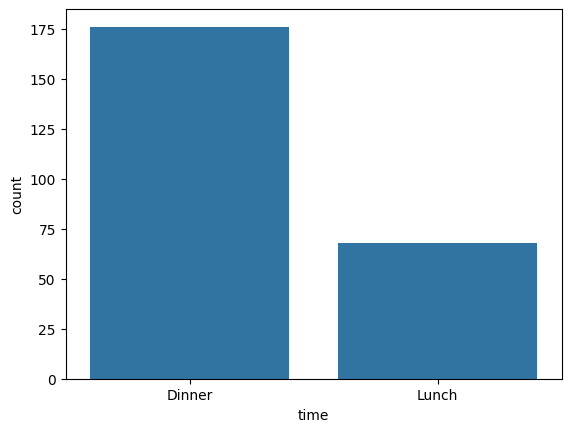

In [20]:
# Coloumn graph
sns.countplot(x= tips['time'])

In [21]:
tips.dtypes
# Categorical shows object data type

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


# Measure of Spread/Dispersion

In [22]:
# range : difference between maximum and minimum value
tips["tip"].max() - tips["tip"].min()

9.0

In [23]:
# variance
round(tips["tip"].var(),3)

1.914

In [24]:
# standard deviation
round(tips["tip"].std(),3)

1.384

To check the level of variability see individual max and min values.

In [25]:
tips['tip'].max()

10.0

In [26]:
tips['tip'].min()

1.0

In [29]:
# quantile
q1,q2,q3 = np.percentile(tips["tip"],[25,50,75])
iqr = q3-q1
print(f"Q1 : {q1} \nQ3 : {q3} \nIQR : {iqr:.2f}")

Q1 : 2.0 
Q3 : 3.5625 
IQR : 1.56


In [33]:
# upper whisker of boxplot showing the last limit or extreme values, above this is outliers
q3+(1.5*iqr)

5.90625

In [35]:
# lower threshold but here it will come negative as no outlier in lower side
q1-(1.5*iqr)

-0.34375

# Inferential Statistics

In [37]:
# Standard error (possible of mean variation if data is changed or added) or variability
from scipy.stats import sem
round(sem(tips['tip']),3)

0.089

In [38]:
data_mean = round(tips['tip'].mean(),3)
data_sem = round(sem(tips['tip']),3)

print(f"Mean : {data_mean} \nSEM : {data_sem}")

Mean : 2.998 
SEM : 0.089


Below are exact values between which mean would lie ()

In [39]:
import scipy.stats as st
st.norm.interval(confidence = 0.95, loc = data_mean, scale = data_sem)

(2.8235632053759354, 3.172436794624065)

The above result could be interpreted that our data true population mean falls between the range 2.82 to 3.17 with 95% confidence level

# Hypothesis Testing
To demonstrate a t-test in Python, we'll use the scipy.stats module to perform an independent two-sample t-test. This test is commonly used to determine if there is a significant difference between the means of two independent groups.

In [1]:
import numpy as np
from scipy.stats import ttest_ind

# sample data : two groups of sample data
group1 = np.array([20,22,19,21,20,23])
group2= np.array([28,30,29,31,27,29])

# performing the t test
t_statistic, p_value = ttest_ind(group1,group2)

#output
print(f"T-statistic : {t_statistic} \nP-value : {p_value}")

T-statistic : -9.800000000000002 
P-value : 1.912309296901757e-06


Interpretation = P value is less than 0.05, null hypothesis is rejected

Chi-Squared Testing

In [4]:
from scipy.stats import chi2_contingency

# defining the table
data = [[207,282,241],[234,242,232]] # list of lists

stat,p,dof,expected = chi2_contingency(data) # dof = degree of freedom

# interpret p-value
alpha = 0.05
print("p value is"+str(p))

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)') #failed to reject

print(stat)

p value is0.1031971404730939
Independent (H0 holds true)
4.542228269825232


Interpretation = There is no signicant relation between the above data, both are independent of each other.

# ANOVA
Analysis of varaiance, test the difference in means of more than two groups.

In [5]:
from scipy.stats import f_oneway
# two way is called if there is dependency between the groups

# Example dataset : Sample data
group1 = np.array([20,21,19,22,24])
group2 = np.array([28,32,30,29,27])
group3 = np.array([18,17,20,22,19])

# Performing the one-way ANOVA
f_statistic, p_value = f_oneway(group1,group2,group3)

# Output
print(f"F-statistic : {f_statistic} \nP-value : {p_value}")

F-statistic : 37.83783783783786 
P-value : 6.5737433948595994e-06


Interpretation = There is signicant difference between the means, the null hypothesis is rejected.

Implementing a two-way ANOVA in Pythoris a bit more involved than a one way ANOVA, as it considers the effect of two independent variables on a dependent variable.

This can also include the interaction effect between the independent variables. For this, we typically use statsmodels library, tich provides a comprehensive function for ANOVA.

Lets create a hypothetical dataset and perform a two-way ANOVA. Assume we have a dataset with two factors (e.g,, FactorA and FactorB a response variable)

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example dataset

data = {
    "Response": [20,21,19,22,23,24,25,19,18,17,22,23,20,21,22,18,17,16],
    "FactorA": ["A1","A1","A1","A1","A1","A1","A2","A2","A2","A2","A2","A2","A3","A3","A3","A3","A3","A3"],
    "FactorB": ["B1","B1","B1","B2","B2","B2","B1","B1","B1","B2","B2","B2","B1","B1","B1","B1","B1","B1"]

}

df = pd.DataFrame(data)

# Perform two-way ANOVA

In [7]:
df

,Response,FactorA,FactorB
0,20,A1,B1
1,21,A1,B1
2,19,A1,B1
3,22,A1,B2
4,23,A1,B2
5,24,A1,B2
6,25,A2,B1
7,19,A2,B1
8,18,A2,B1
9,17,A2,B2


In [8]:
# Ordinary Least Squares (OLS) model

model = ols("Response ~ C(FactorA) + C(FactorB) + C(FactorA):C(FactorB)", data = df).fit()
# ~ is called tilda

# Two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ = 2)
print(anova_table)

                          sum_sq    df         F    PR(>F)
C(FactorA)              6.139471   2.0  0.490654  0.495982
C(FactorB)                   NaN   1.0       NaN       NaN
C(FactorA):C(FactorB)  13.500000   2.0  1.078893  0.317880
Residual               81.333333  13.0       NaN       NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In this code:
Response is the dependent variable.
FactorA and FactorB are the two independent variables.
The ols function from statsmodels.formula.ap is used to fit an ordinary least squares regression model.

df = degree of freedom
F = f test value

anova_lm performs the ANOVA test.
typ=2 specifies the type of sum of squares to be used, which is appropriate.

This will give you the F-statistics and p-values for each factor and their interaction, helping you determine if factors are dependent on the response variable.

Interpreting these results:
The p-values for Factor A and Factor B are higher than a typical alpha level of 0.05, suggesting that neither Factor A nor Factor B have statistically significant effect on the response variable individually.

However, the interaction between Factor A and Factor B has a p-value close to 0.05, indicating that there may be a statistically significant interaction effect between these two factors on the response variable.

It's important to note that the choice of alpha level for significance can vary based on the context and field of study. A P quite close to 0.5 is commonly used threshold of 0.05.

This analysis suggests that while the individual factors may not significantly influence the response, their interaction might.